In [1]:
import duckdb
import pandas as pd
import plotly.express as px
from plotly_calplot import calplot

from common.env_variables import DUCKDB_DWH_FILE


conn = duckdb.connect(DUCKDB_DWH_FILE, read_only=True)

def display_df(_df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, "expand_frame_repr", False,
                           "display.float_format", '${:,.2f}'.format):
        display(_df.fillna('.'))


def display_sql(sql_statement):
    _df = conn.execute(sql_statement).df()
    display_df(_df)
    return _df


In [2]:
display_sql(f'''
SELECT *
FROM fact_online_job
''')

,date_id,total
0,2021-10-09,113858
1,2021-10-10,111325
2,2021-10-11,111745
3,2021-10-12,114141
4,2021-10-13,116319
5,2021-10-14,116914
6,2021-10-15,118022
7,2021-10-16,116119
8,2021-10-17,113591
9,2021-10-18,113450


,date_id,total
0,2021-10-09,113858
1,2021-10-10,111325
2,2021-10-11,111745
3,2021-10-12,114141
4,2021-10-13,116319
...,...,...
345,2022-09-19,139283
346,2022-09-20,139955
347,2022-09-21,142079
348,2022-09-22,144792


In [3]:
df = conn.execute(f'''
SELECT *
FROM count_job_online_by_date
;
''').df()

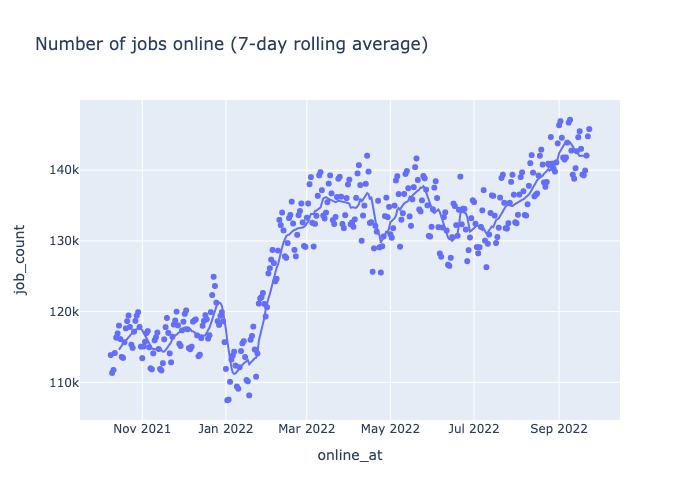

In [4]:
fig = px.scatter(df, x='online_at', y='job_count', trendline='rolling', trendline_options=dict(window=7),
                 title='Number of jobs online (7-day rolling average)')
fig.show('png')

In [5]:
df = conn.execute(f'''
SELECT *
FROM job_online_by_date_change
;
''').df()

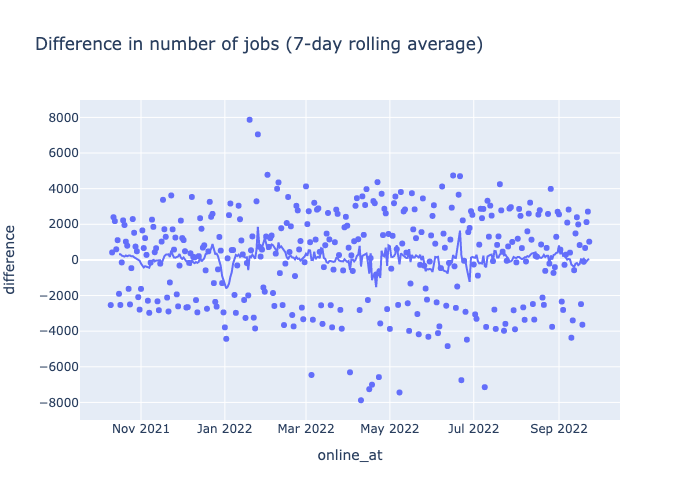

In [6]:

fig = px.scatter(df, x='online_at', y='difference', trendline='rolling', trendline_options=dict(window=7),
                 title='Difference in number of jobs (7-day rolling average)')
fig.show('png')

In [7]:
min_difference = df['difference'].min()
df['difference'] = df['difference'] - min_difference
print(df['difference'].min())

0


In [8]:
idx = pd.date_range('2021-01-01', '2022-12-31')
df = df.set_index('online_at')
df = df.reindex(idx, fill_value=-min_difference)
df = df.reset_index()
df = df.rename(columns={'index': 'online_at'})

/Users/carrion/PycharmProjects/job-market-analytics/python/simplescraper/venv/lib/python3.10/site-packages/plotly_calplot/date_extractors.py:16: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/Users/carrion/PycharmProjects/job-market-analytics/python/simplescraper/venv/lib/python3.10/site-packages/plotly_calplot/date_extractors.py:16: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



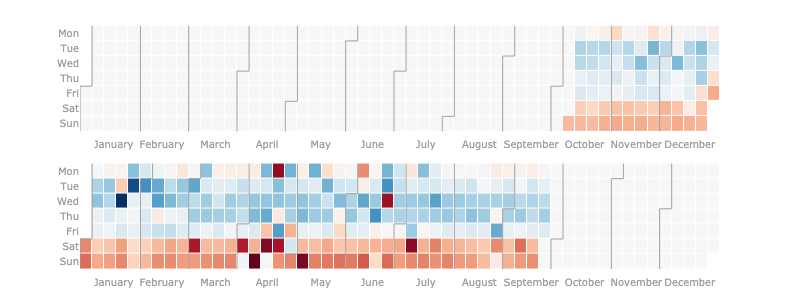

In [9]:
fig = calplot(
    df,
    x='online_at',
    y='difference',
    colorscale='RdBu'
)
fig.show('png')

In [10]:
df = conn.execute(f'''
SELECT * FROM top_location
''').df()
display_df(df)

,location,job_count
0,Berlin,97701
1,Hamburg,88139
2,München,85131
3,Frankfurt am Main,54901
4,Stuttgart,44539
5,Köln,43895
6,Düsseldorf,42317
7,Hannover,21673
8,Nürnberg,18654
9,Leipzig,16309


In [11]:
df = conn.execute(f'''
SELECT * FROM top_company;
''').df()
display_df(df)

,company,job_count
0,Deutsche Bahn AG,13569
1,Bosch Gruppe,8999
2,Bertrandt AG,5801
3,HAPEKO Hanseatisches Personalkontor GmbH,5798
4,meinestadt.de,5063
5,Mercedes - Benz AG,4983
6,StepStone GmbH,4907
7,ZEISS,4851
8,Korian Deutschland AG,3702
9,IU Internationale Hochschule,3426


In [12]:
conn.close()